<a href="https://colab.research.google.com/github/Pushpa-9392/Laptop_Price_Prediction/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving laptop_dataset_3000.csv to laptop_dataset_3000.csv


In [ ]:
df = pd.read_csv("laptop_dataset_3000.csv")   # change file name if different
df.head() # Display first 5 Rows


,Sr no,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU Brand,SSD,HDD,Adapter,Battery_Life
0,1,HP,Laptop-1,33309,Ryzen 5,AMD,Yes,32GB,DDR4,3.5,IPS,13.3 inch,GTX 1650,NVIDIA,512GB,1TB,65W,10
1,2,Apple,Laptop-2,110445,i7,AMD,Yes,32GB,DDR4,3.0,LED,16 inch,GTX 1650,NVIDIA,512GB,2TB,120W,12
2,3,Lenovo,Laptop-3,90626,Ryzen 7,Apple,Yes,16GB,DDR4,2.3,IPS,15.6 inch,RTX 3050,AMD,1TB,2TB,90W,7
3,4,Asus,Laptop-4,36982,Ryzen 5,Intel,No,32GB,DDR5,2.2,OLED,16 inch,RTX 3050,Intel,512GB,2TB,65W,7
4,5,Acer,Laptop-5,60638,i7,Intel,No,8GB,DDR4,2.9,IPS,13.3 inch,RTX 3050,Intel,512GB,NaN,120W,7


In [ ]:
df.shape

(3000, 18)

In [ ]:
df.describe() # it shows basic statistics of numerical column like mean(),std()

,Price,Ghz,Battery_Life
count,3000.000000,3000.000000,3000.000000
mean,90460.179667,3.155567,8.593000
std,34571.913293,0.781575,2.285554
min,30022.000000,1.800000,5.000000
25%,61068.000000,2.500000,7.000000
50%,91558.000000,3.100000,9.000000
75%,120167.000000,3.800000,11.000000
max,149932.000000,4.500000,12.000000


In [ ]:
df.info() #Check Data set information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sr no            30 non-null     int64  
 1   Brand            30 non-null     object 
 2   Name             30 non-null     object 
 3   Price            30 non-null     int64  
 4   Processor_Name   30 non-null     object 
 5   Processor_Brand  30 non-null     object 
 6   RAM_Expandable   30 non-null     object 
 7   RAM              30 non-null     object 
 8   RAM_TYPE         30 non-null     object 
 9   Ghz              30 non-null     float64
 10  Display_type     30 non-null     object 
 11  Display          30 non-null     float64
 12  GPU              30 non-null     object 
 13  GPU_Brand        30 non-null     object 
 14  SSD              30 non-null     int64  
 15  HDD              30 non-null     int64  
 16  Adapter          30 non-null     object 
 17  Battery_Life     3

In [ ]:
df.isnull().sum()  #Check minssing values

,0
Sr no,0
Brand,0
Name,0
Price,0
Processor_Name,0
Processor_Brand,0
RAM_Expandable,0
RAM,0
RAM_TYPE,0
Ghz,0


In [ ]:
df.columns

Index(['Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand',
       'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display',
       'GPU', 'GPU Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life'],
      dtype='object')

In [ ]:
df["Sr no"] = range(1, len(df) + 1)

In [ ]:
df.columns

Index(['Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand',
       'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display',
       'GPU', 'GPU Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life'],
      dtype='object')

In [ ]:
#Clean Price Columns
#df["Price"] = df["Price"].str.replace("₹","").str.replace(",","").astype(float)
df["Price"].dtype
df["Price"] = df["Price"].astype(float)
df["Price"].head(20)

,Price
0,33309.0
1,110445.0
2,90626.0
3,36982.0
4,60638.0
5,35214.0
6,132784.0
7,80404.0
8,91275.0
9,115262.0


In [ ]:
df = df[["Brand", "Price"]]
df


,Brand,Price
0,HP,33309.0
1,Apple,110445.0
2,Lenovo,90626.0
3,Asus,36982.0
4,Acer,60638.0
...,...,...
2995,Apple,69478.0
2996,Asus,50786.0
2997,Asus,51276.0
2998,Lenovo,55817.0


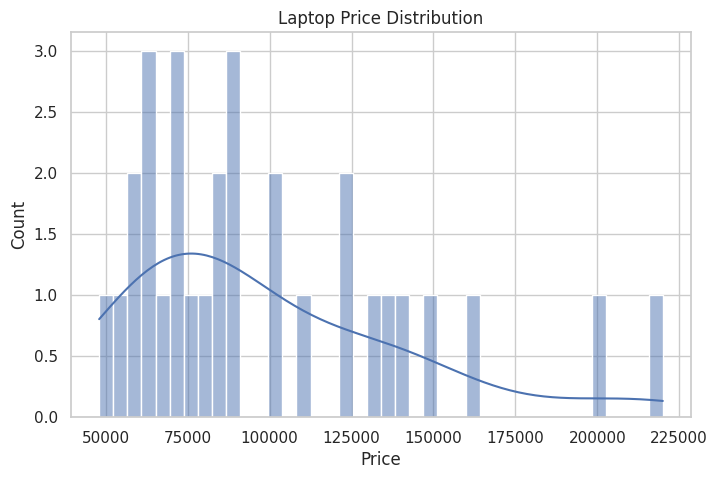

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=40, kde=True)
plt.title("Laptop Price Distribution")
plt.show()


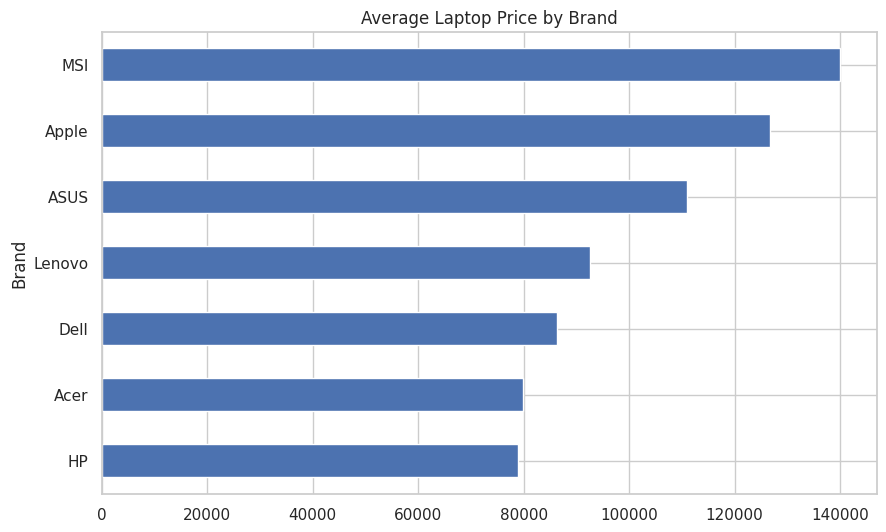

In [ ]:
brand_price = df.groupby("Brand")["Price"].mean().sort_values()

plt.figure(figsize=(10,6))
brand_price.plot(kind="barh")
plt.title("Average Laptop Price by Brand")
plt.show()


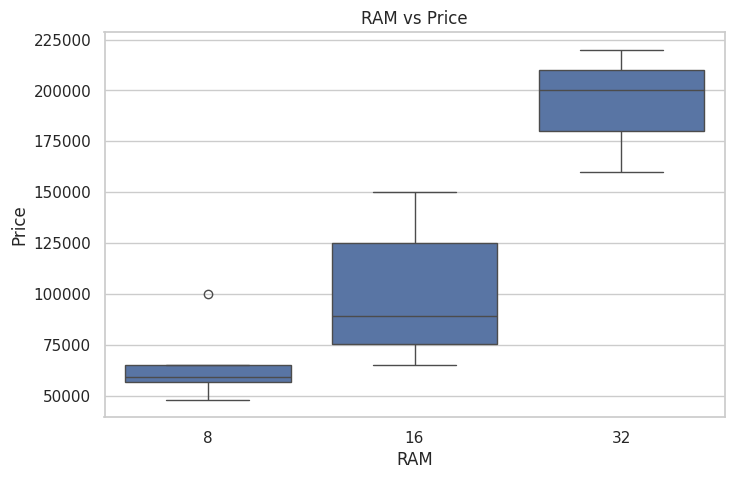

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="RAM", y="Price", data=df)
plt.title("RAM vs Price")
plt.show()


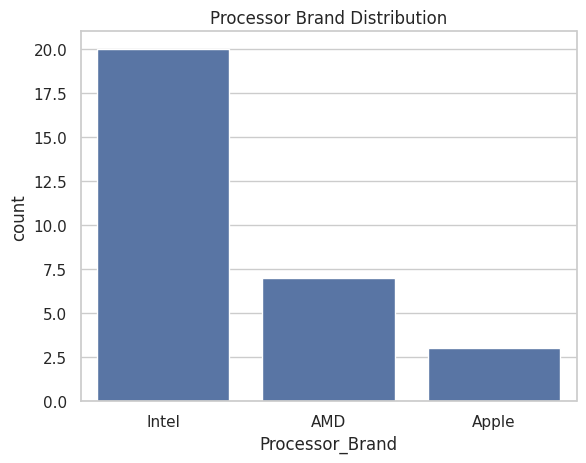

In [ ]:
sns.countplot(x="Processor_Brand", data=df)
plt.title("Processor Brand Distribution")
plt.show()


In [ ]:
df.groupby("RAM")["Price"].mean()


,Price
RAM,
8,64275.714286
16,97790.000000
32,193323.333333


In [ ]:
df.groupby("Processor_Brand")["Price"].mean()


,Price
Processor_Brand,
AMD,98561.428571
Apple,126656.666667
Intel,95790.000000


In [ ]:
df[df["Price"] < 50000][["Brand","Name","RAM","SSD","Price"]].head(10)


,Brand,Name,RAM,SSD,Price
2,Lenovo,IdeaPad Slim 3,8,256,47990.0


In [ ]:
df.sort_values("Battery_Life", ascending=False)[["Brand","Name","Battery_Life","Price"]].head(10)


,Brand,Name,Battery_Life,Price
24,Apple,MacBook Air M2,18,129990.0
11,Apple,MacBook Pro M1,17,149990.0
14,Lenovo,ThinkPad X1 Carbon,15,139990.0
4,Apple,MacBook Air M1,15,99990.0
10,ASUS,ASUS ZenBook 14,12,87990.0
12,Dell,Dell XPS 13,12,124990.0
19,HP,HP Envy x360,11,79990.0
27,Lenovo,Lenovo Yoga Slim 7,10,99990.0
9,Acer,Acer Swift 3,10,67990.0
26,HP,HP Pavilion x360,8,64990.0


In [ ]:
df[df["RAM"]>=16][["Brand","Name","RAM","Price"]].sort_values("Price")


,Brand,Name,RAM,Price
1,Dell,Dell Inspiron 14,16,64990.0
9,Acer,Acer Swift 3,16,67990.0
25,Dell,Dell Inspiron 15,16,69990.0
23,ASUS,ASUS VivoBook S15,16,69990.0
21,Acer,Acer Nitro 5,16,72990.0
28,Acer,Acer Swift 5,16,75990.0
19,HP,HP Envy x360,16,79990.0
18,Dell,Dell G15,16,84990.0
3,ASUS,ASUS TUF Gaming,16,85990.0
10,ASUS,ASUS ZenBook 14,16,87990.0


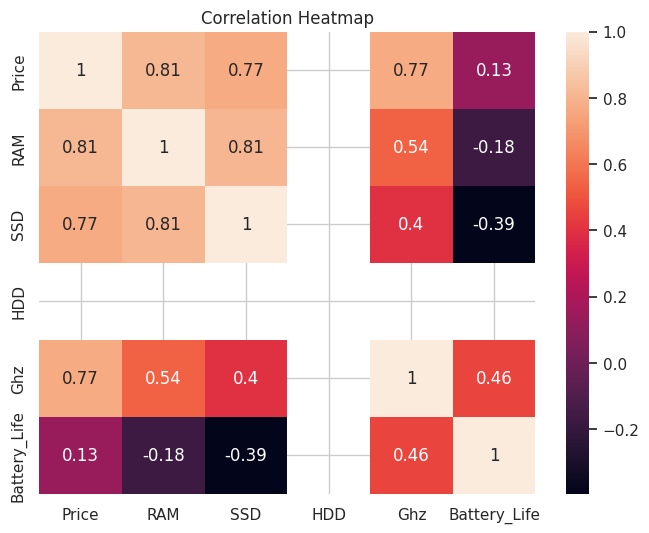

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Price","RAM","SSD","HDD","Ghz","Battery_Life"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()
